In [68]:
import numpy as np 
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
import warnings

warnings.filterwarnings("ignore")

In [71]:
df=pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [72]:
df.shape

(10000, 10)

In [73]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [75]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

# data visualization

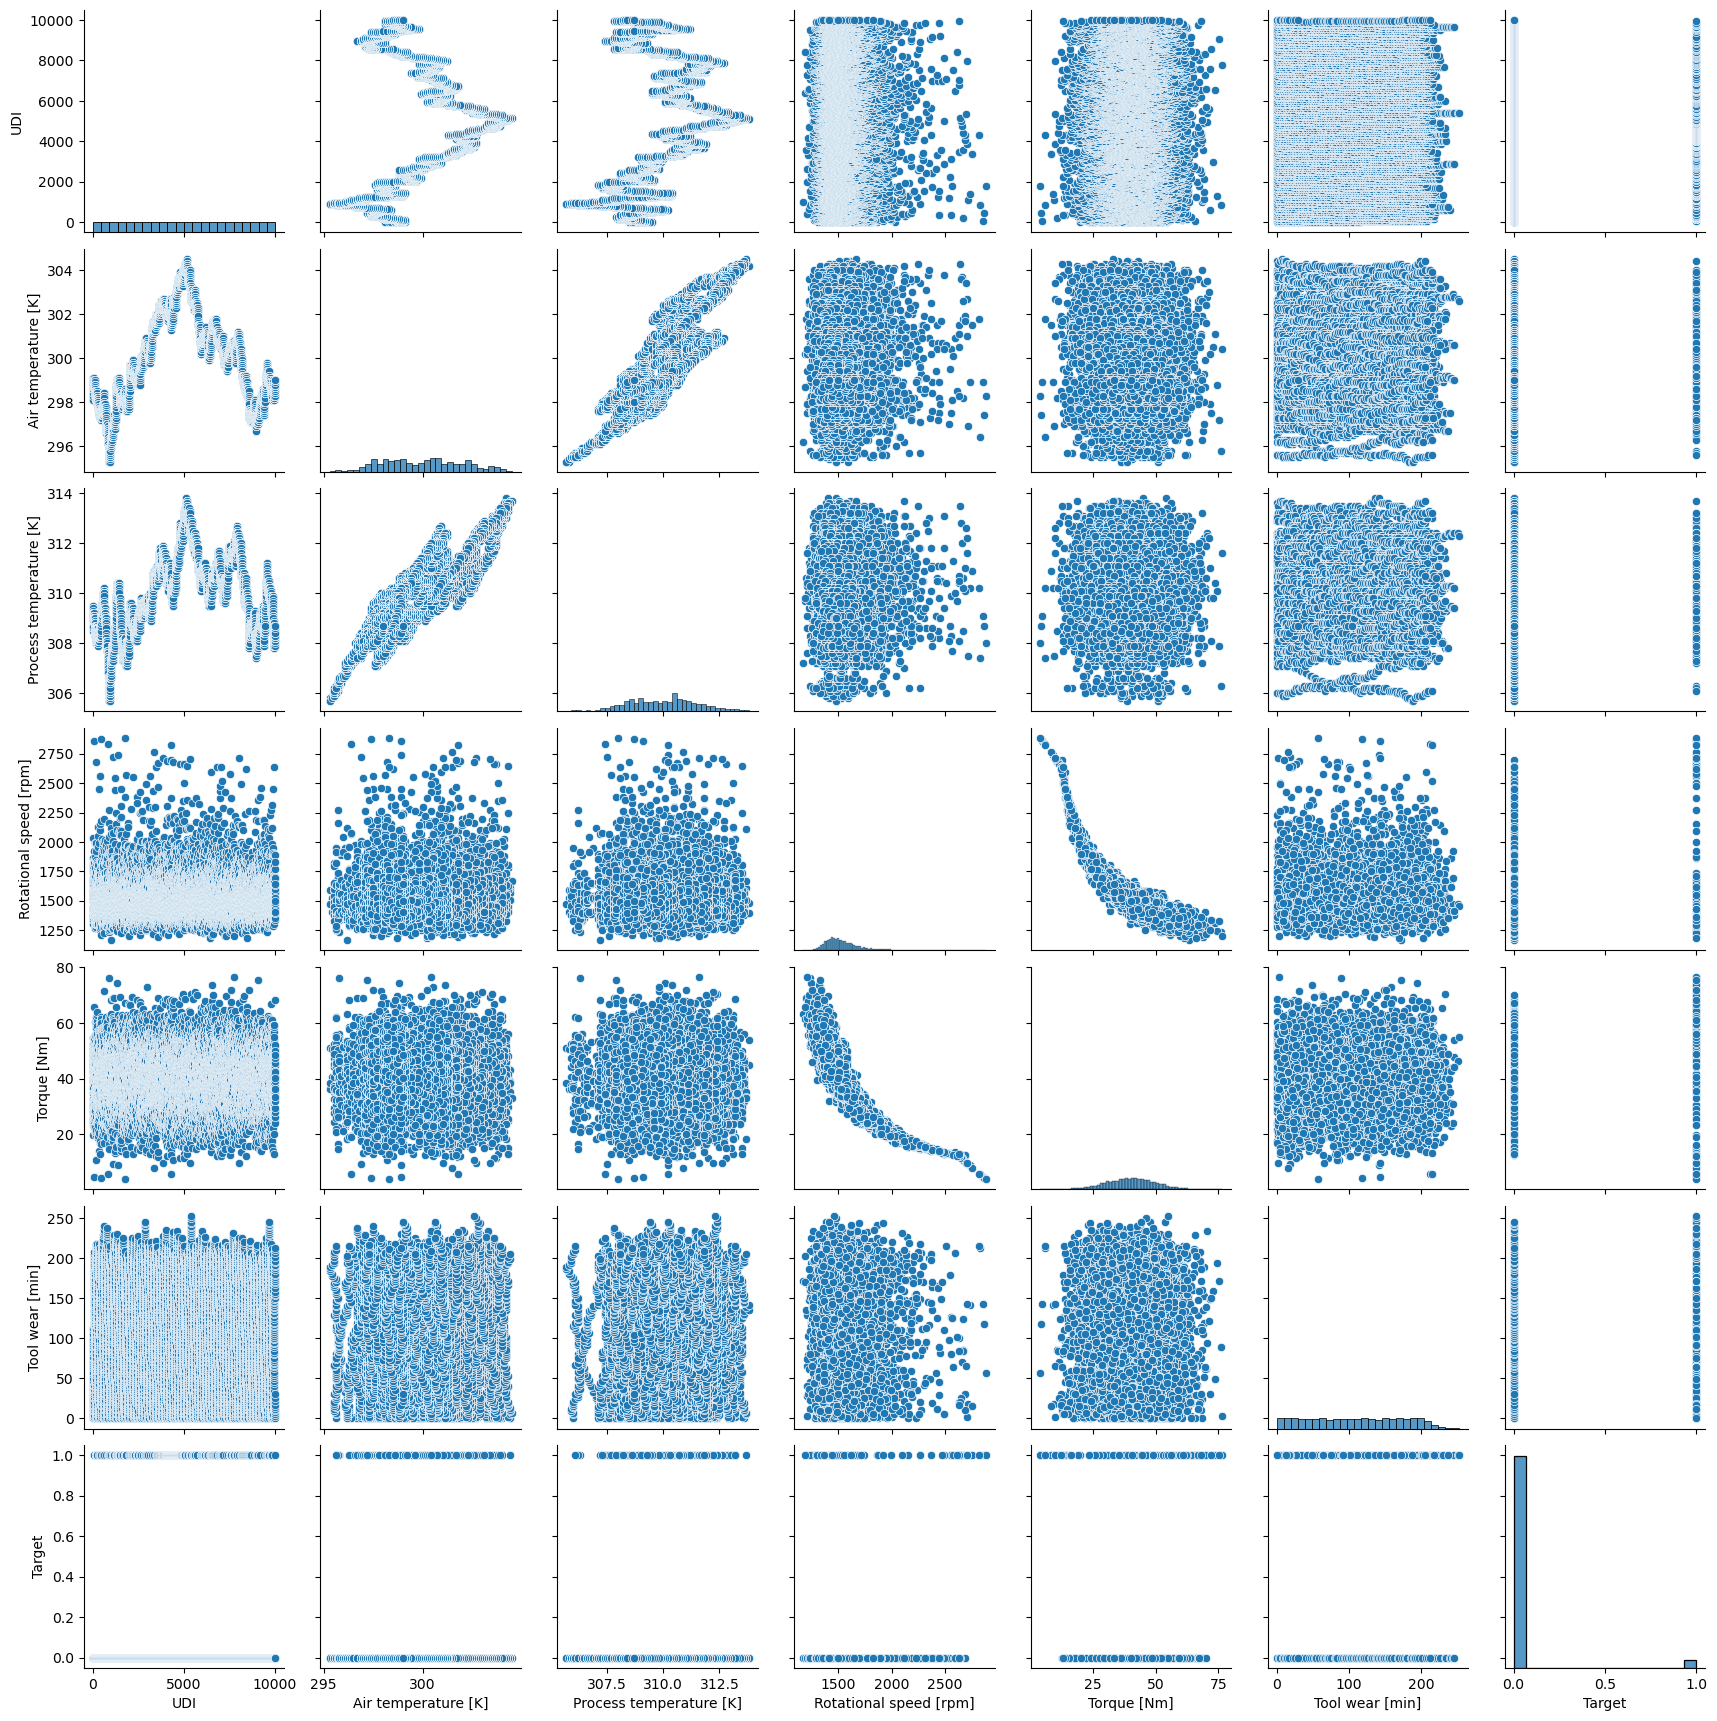

In [76]:
sns.pairplot(df)

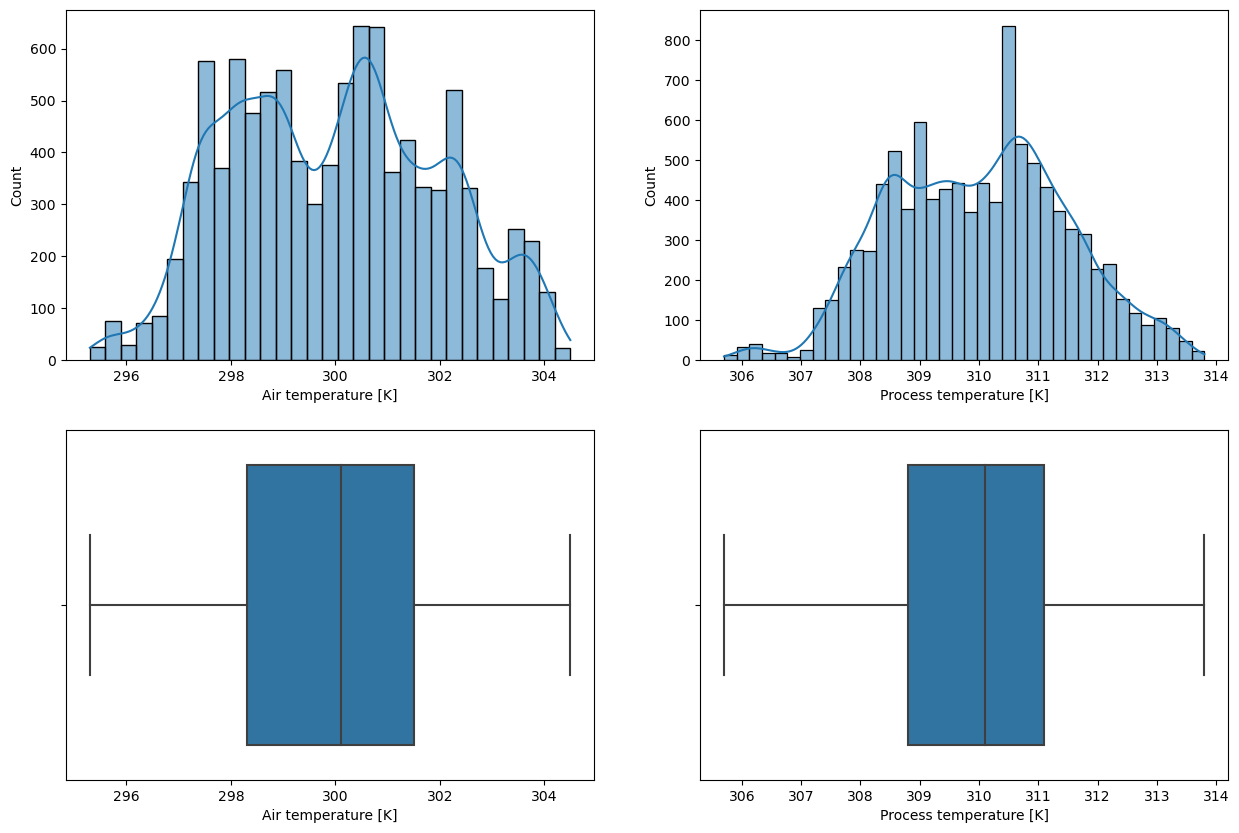

In [77]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))
sns.histplot(data=df, x='Air temperature [K]', kde=True, ax=ax[0,0])
sns.histplot(data=df, x='Process temperature [K]', kde=True, ax=ax[0,1])
sns.boxplot(data=df, x='Air temperature [K]', ax=ax[1,0])
sns.boxplot(data=df, x='Process temperature [K]', ax=ax[1,1])
plt.show()

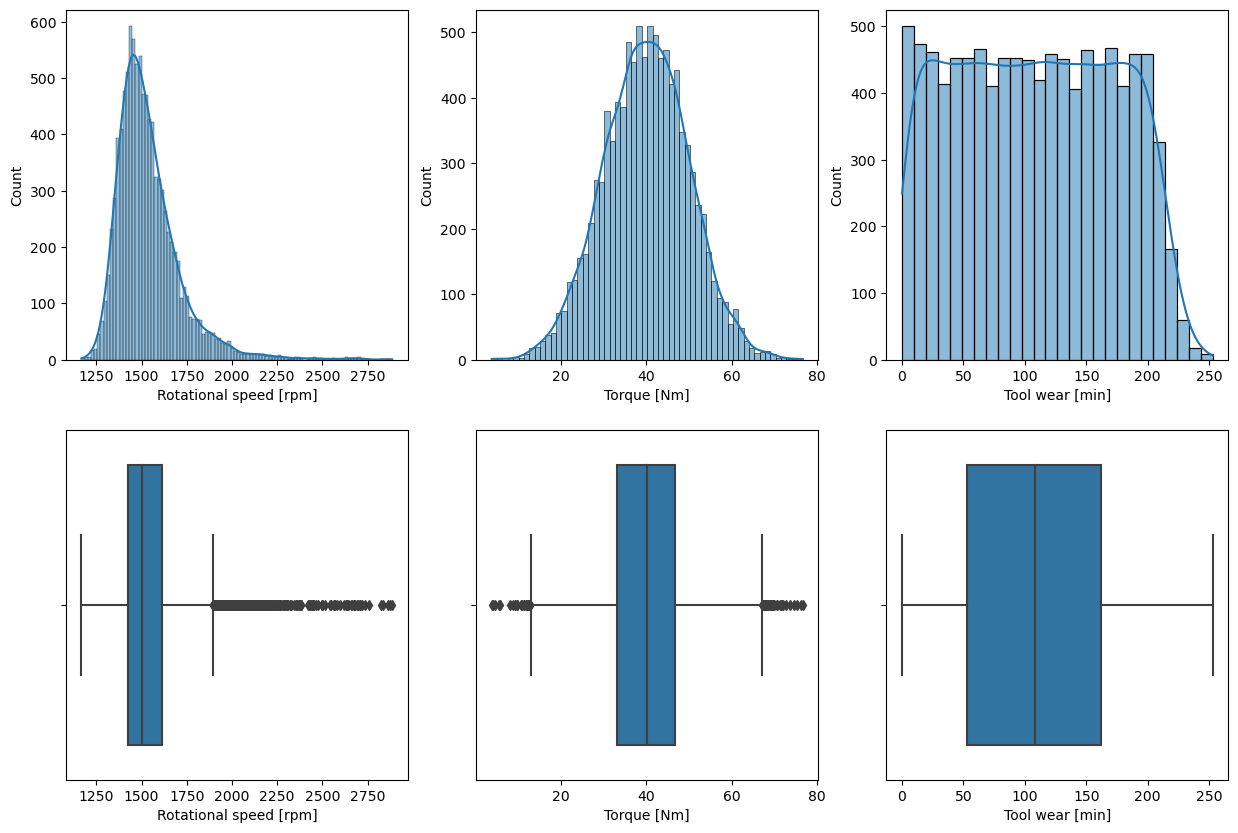

In [78]:
fig1, ax1 = plt.subplots(2, 3, figsize=(15,10))
sns.histplot(data=df, x='Rotational speed [rpm]', kde=True, ax=ax1[0,0])
sns.histplot(data=df, x='Torque [Nm]', kde=True, ax=ax1[0,1])
sns.histplot(data=df, x='Tool wear [min]', kde=True, ax=ax1[0,2])
sns.boxplot(data=df, x='Rotational speed [rpm]', ax=ax1[1,0])
sns.boxplot(data=df, x='Torque [Nm]', ax=ax1[1,1])
sns.boxplot(data=df, x='Tool wear [min]', ax=ax1[1,2])
plt.show()
    

In [79]:
from collections import OrderedDict
import seaborn as sns

colors = ["#845EC2", "#D65DB1", "#FF6F91", "#FF9671", 
             "#FFC75F", "#008F7A", "#F9F871"]
# background_color = "#FFF6FF"
background_color = "white"

In [80]:
def show_category_distribution(data_frame,label_name,colors,exclude=[],figsize=(10, 5),d=[1, 2],bg_color=background_color):
    
    label_dict = data_frame[label_name].value_counts().to_dict()
    for e in exclude:
        del label_dict[e]
    label_dict = OrderedDict(sorted(label_dict.items(), key=lambda label: label[1]))
    label_classes= label_dict.keys()
    label_values = label_dict.values()
    explode = (0,)*(data_frame[label_name].nunique() - len(exclude))
    
    fig, ax = plt.subplots(d[0], d[1], facecolor=bg_color, figsize=figsize)
    sns.countplot(data=data_frame,
                  x=label_name,
                  palette=colors,
                  edgecolor="black",
                  hatch="\\",
                  ax=ax[0],
                  linewidth=1,
                  order = data_frame[label_name].value_counts().index)
    ax[0].set_title(f"Distribution of \"{label_name}\"", size=14, fontweight="bold")
    ax[0].set_xlabel("Class", size=10, fontweight="bold")
    ax[0].set_ylabel("Frequency", size=10, fontweight="bold")
    ax[0].tick_params(axis="x", labelsize=9) 
    ax[0].tick_params(axis="y", labelsize=9)
    ax[0].bar_label(ax[0].containers[0], fmt="%.0f", color="black", fontsize=9)
    
    plt.pie(label_values,
            explode=explode,
            labels=label_classes,
            autopct="%1.2f%%",
            shadow=True,
            startangle=90,
            textprops={"fontsize": 8, "fontweight": "bold", "color": "black"},
            wedgeprops={"edgecolor": "black"},
            colors=colors,
            labeldistance=1.1)
    plt.title(f"Distribution \n of \"{label_name}\". {','.join(exclude)} {'Excluded' if len(exclude)>0 else ''}",
              fontweight="bold",
              fontsize=14)

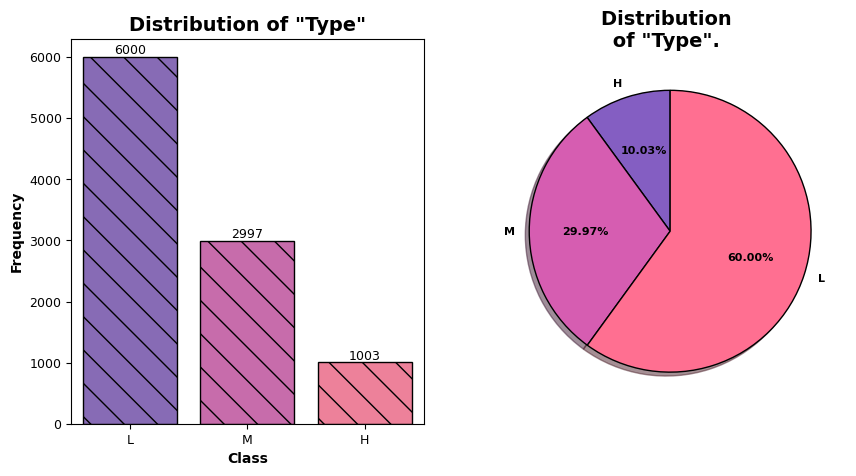

In [81]:
show_category_distribution(df,
                        "Type",
                        colors,
                        bg_color=background_color)

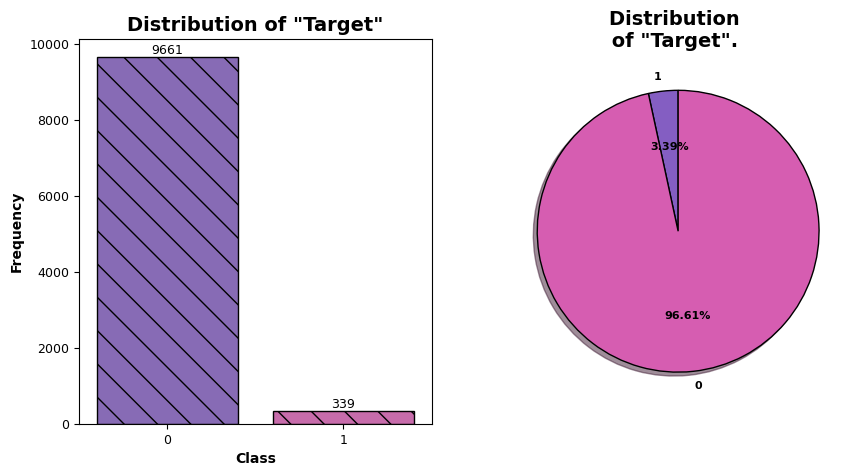

In [82]:
show_category_distribution(df,
                        "Target",
                        colors,
                        bg_color=background_color)

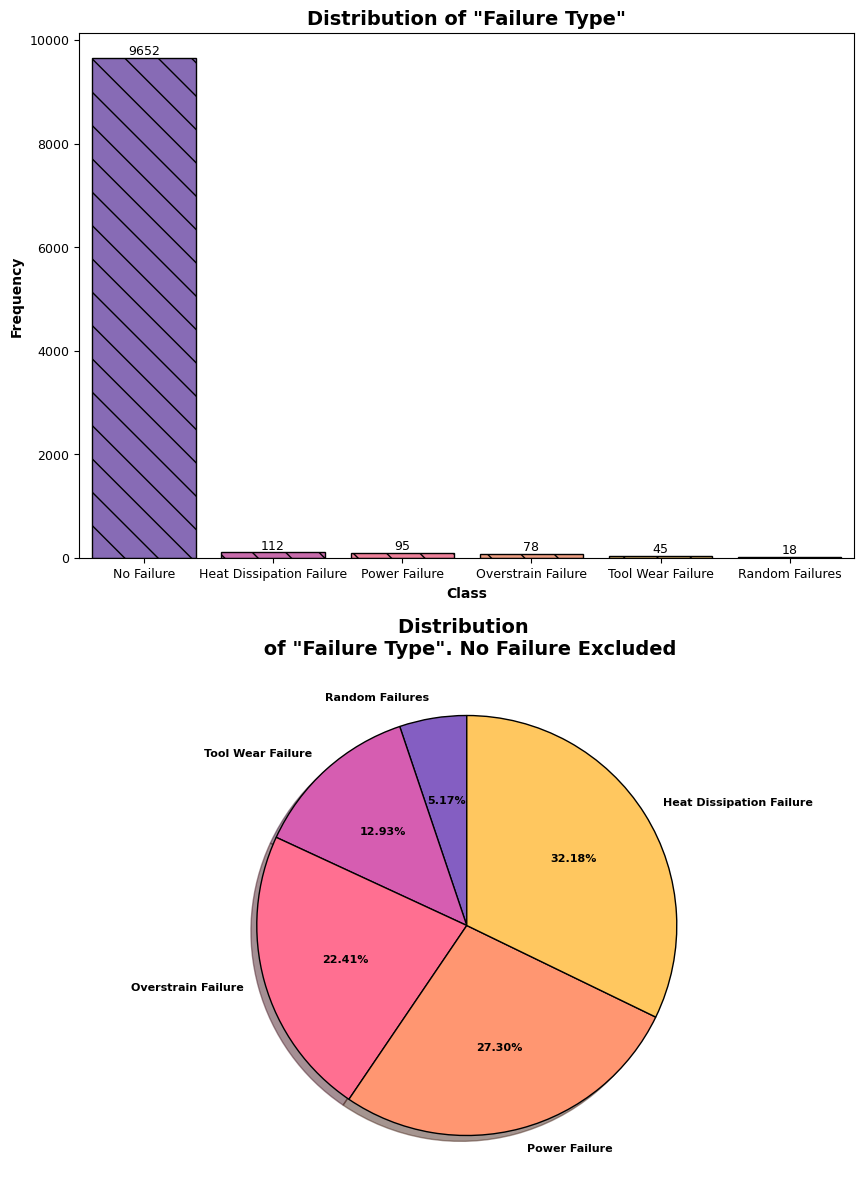

In [83]:
show_category_distribution(df,
                        "Failure Type",
                        colors,
                        exclude=["No Failure"],
                        figsize=(10, 15),
                        d=[2, 1],
                        bg_color=background_color)

In [84]:
def show_outliers(data_frame, exclude=[]):
    columns_list = list(data_frame.columns)
    
    if len(exclude) > 0:
        for e in exclude:
            columns_list.remove(e)

    fig = plt.figure(figsize=(10,30), facecolor=background_color)
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for index, column in enumerate(columns_list):
        ax = fig.add_subplot(12, 3, index +1)
        ax = sns.boxplot(x=df[column],
                         notch=True,
                         flierprops={"marker": "x"},
                         boxprops={"facecolor": (.4, .6, .8, .5)},
                         medianprops={"color": "#C34A36"})

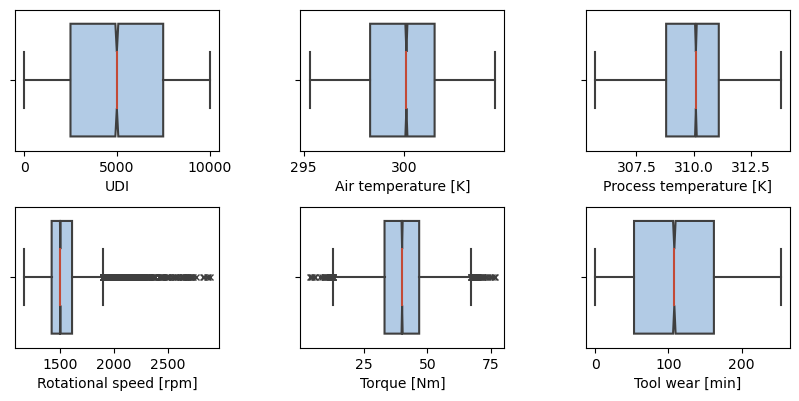

In [85]:
show_outliers(df, exclude=["Failure Type", "Type", "Target", "Product ID"])

In [86]:
def show_correlation(data_frame):
    plt.figure(figsize=(10,10), facecolor=background_color)
    corr = data_frame.corr(numeric_only=False)
    sns.heatmap(corr, annot=True, cmap=colors[0:5][::-1])
    plt.title("Correlations", size=22, fontweight="bold")
    plt.tight_layout()

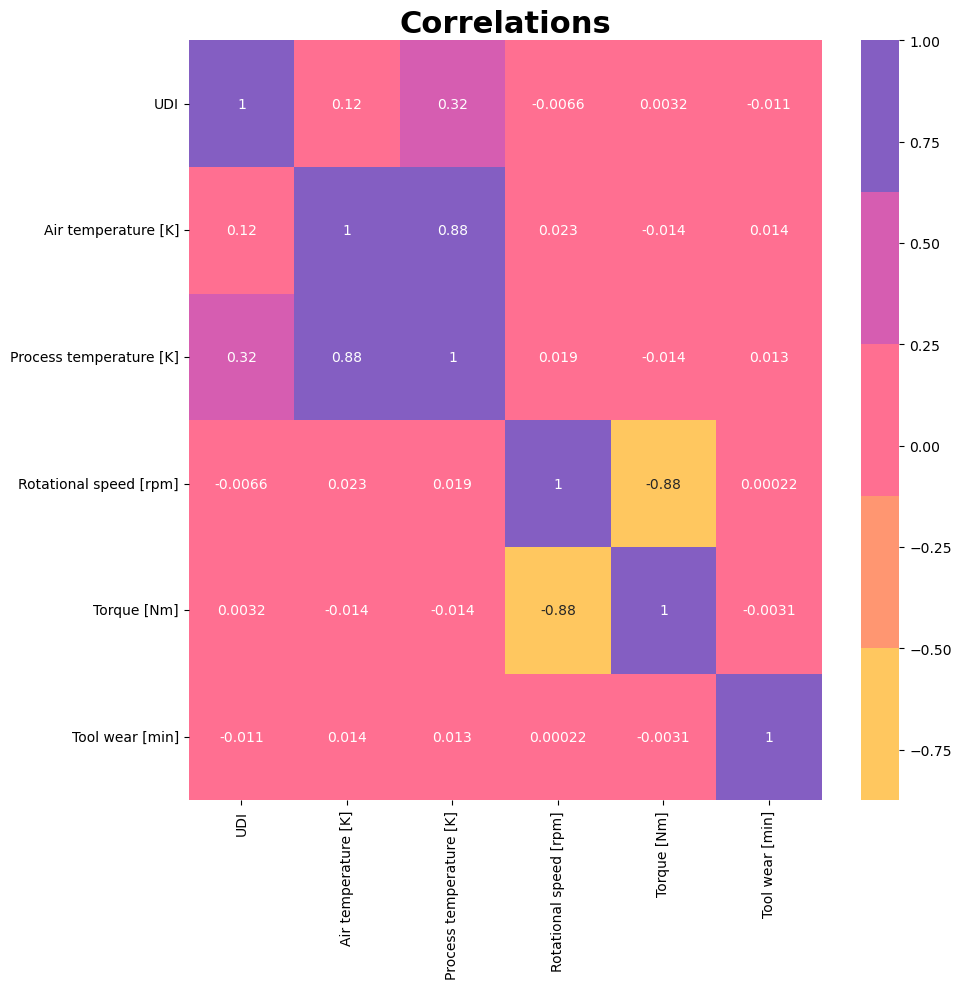

In [87]:
show_correlation(df.drop(["Product ID", "Type", "Target", "Failure Type"], axis=1))

In [88]:
from sklearn.model_selection import train_test_split

df_temp=df.copy()

In [89]:
df_temp=df_temp.drop(["UDI","Product ID"], axis=1)
X = df_temp.drop("Failure Type", axis=1)
y = df_temp["Failure Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

# Preprocessing data

In [90]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

one_hot_encoder = OneHotEncoder()
transformer = ColumnTransformer([("one_hot_encoder", one_hot_encoder, ["Type", "Target"])],
                                remainder="passthrough")

In [91]:
transformer.fit(X_train)
encoded_X_train = transformer.transform(X_train)
encoded_X_test = transformer.transform(X_test)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [93]:
random_state = 7
verbose = 0

def classification_report_heatmap(cr, model_name=""):
    plt.figure(figsize=(12, 5), facecolor=background_color)
    plt.title(f"{model_name} Classification Report Heat Map")
    sns.heatmap(pd.DataFrame(cr).iloc[:-1].T, annot=True, cmap=colors);

In [94]:
def confusion_matrix_display(estimator,
                             predicted_y,
                             true_y=encoded_y_test,
                             X=encoded_X_test,
                             y=encoded_y_test,
                             model_name=""):
    
    fig, ax = plt.subplots(figsize=(6, 6), facecolor=background_color)
    cm = confusion_matrix(predicted_y, true_y)
    cmd = ConfusionMatrixDisplay(cm)
    cmd.from_estimator(estimator, X, y, ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=random_state, verbose=verbose)
rfc.fit(encoded_X_train, encoded_y_train)

RandomForestClassifier(random_state=7)

In [96]:
rfc.score(encoded_X_train, encoded_y_train)

1.0

In [97]:
rfc.score(encoded_X_test, encoded_y_test)

0.9953333333333333

In [98]:
rfc_predicted_y = rfc.predict(encoded_X_test)

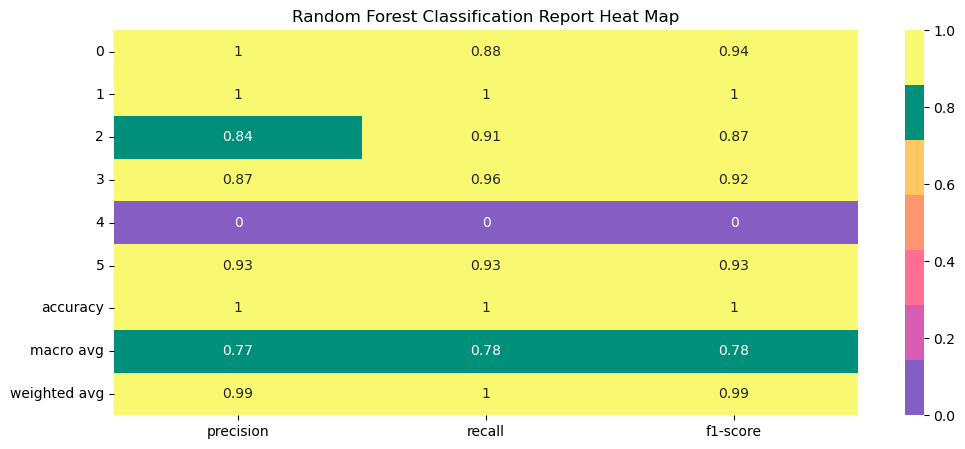

In [99]:
rfc_cr = classification_report(encoded_y_test, rfc_predicted_y, output_dict=True)
classification_report_heatmap(rfc_cr, model_name="Random Forest")

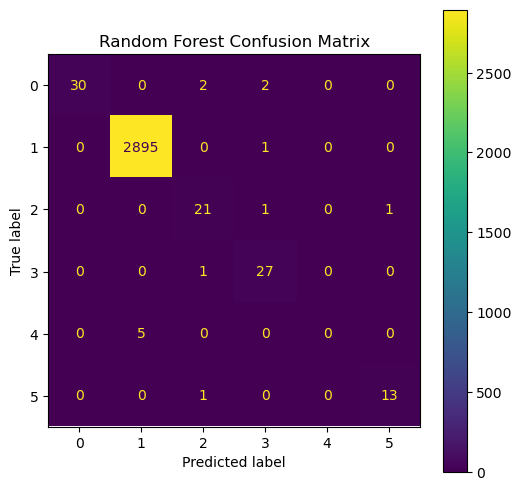

In [100]:
confusion_matrix_display(rfc, rfc_predicted_y, model_name="Random Forest")

# Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state=random_state)
lr.fit(encoded_X_train,encoded_y_train)

LogisticRegression(random_state=7)

In [102]:
lr.score(encoded_X_train,encoded_y_train)

0.9667142857142857

In [103]:
lr_predicted_y=lr.predict(encoded_X_test)

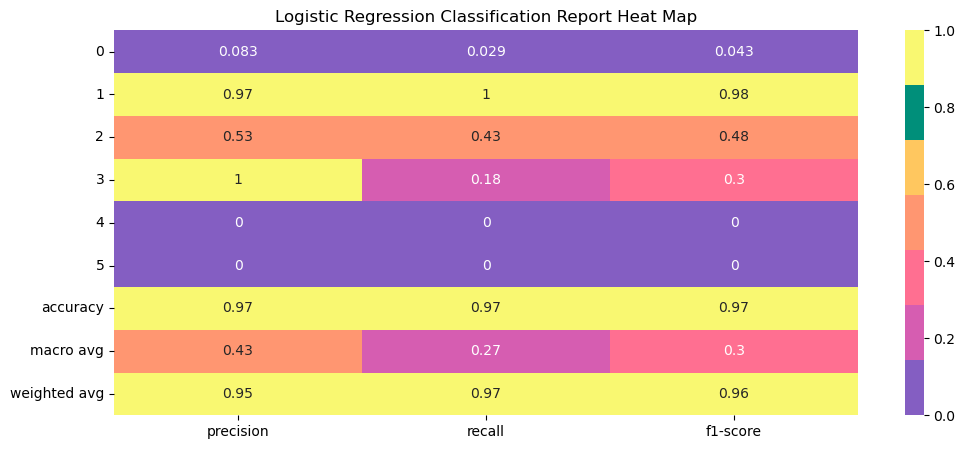

In [104]:
lr_cr = classification_report(encoded_y_test, lr_predicted_y, output_dict=True)
classification_report_heatmap(lr_cr, model_name="Logistic Regression")

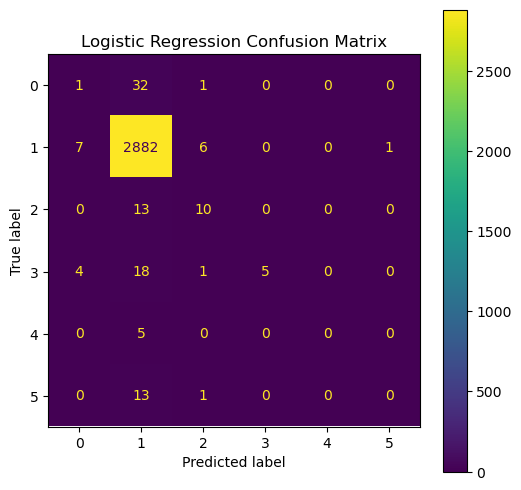

In [105]:
confusion_matrix_display(lr, lr_predicted_y, model_name="Logistic Regression")

# Decision Tree

In [106]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=random_state)
dtc.fit(encoded_X_train, encoded_y_train)

DecisionTreeClassifier(random_state=7)

In [107]:
dtc.score(encoded_X_train, encoded_y_train)

1.0

In [108]:
dtc.score(encoded_X_test, encoded_y_test)

0.9896666666666667

In [109]:
dtc_predicted_y = dtc.predict(encoded_X_test)

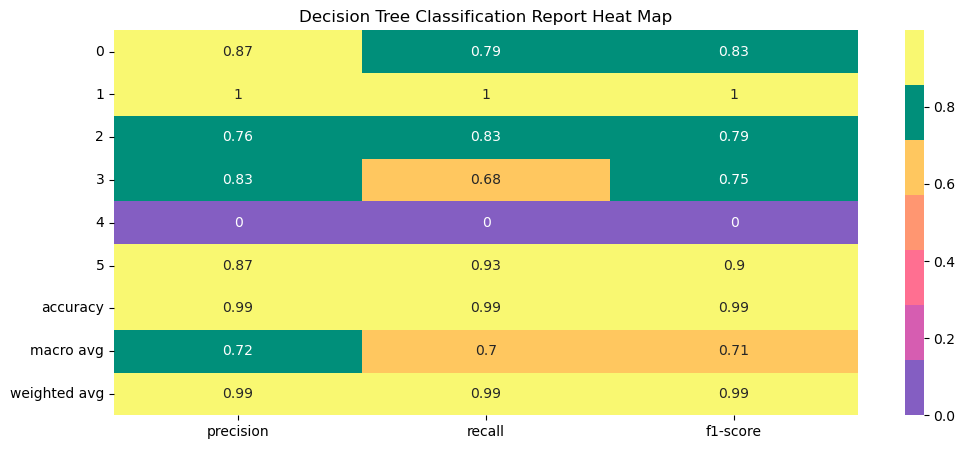

In [110]:
dtc_cr = classification_report(encoded_y_test, dtc_predicted_y, output_dict=True)
classification_report_heatmap(dtc_cr, model_name="Decision Tree")

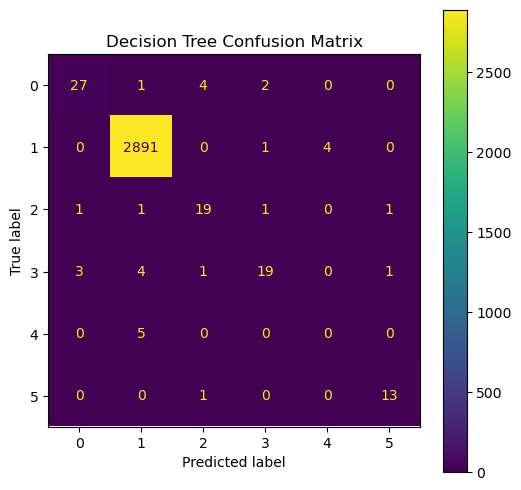

In [111]:
confusion_matrix_display(dtc, dtc_predicted_y, model_name="Decision Tree")

# Support vector Machine classifier

In [112]:
from sklearn.svm import SVC

svc = SVC(random_state=random_state)
svc.fit(encoded_X_train, encoded_y_train);

In [113]:
svc.score(encoded_X_train, encoded_y_train)

0.9667142857142857

In [114]:
svc.score(encoded_X_test, encoded_y_test)

0.9666666666666667

In [115]:
svc_predicted_y = svc.predict(encoded_X_test)

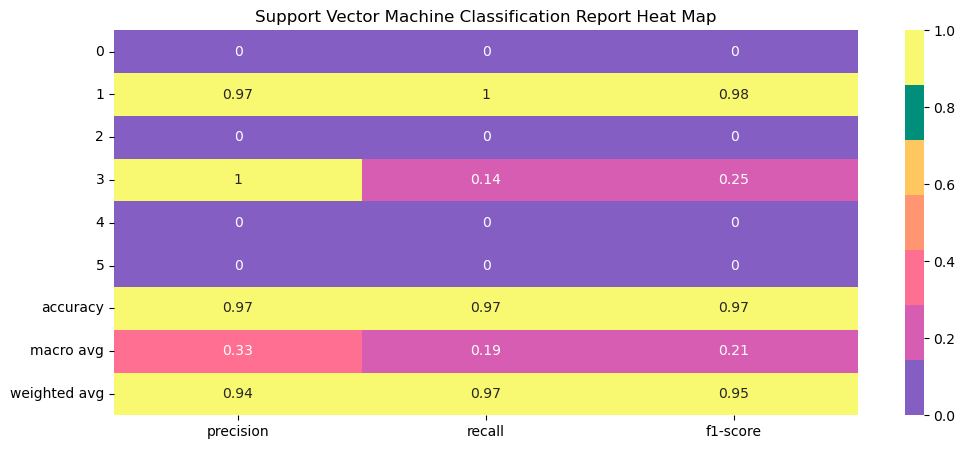

In [116]:
svc_cr = classification_report(encoded_y_test, svc_predicted_y, output_dict=True)
classification_report_heatmap(svc_cr, model_name="Support Vector Machine")

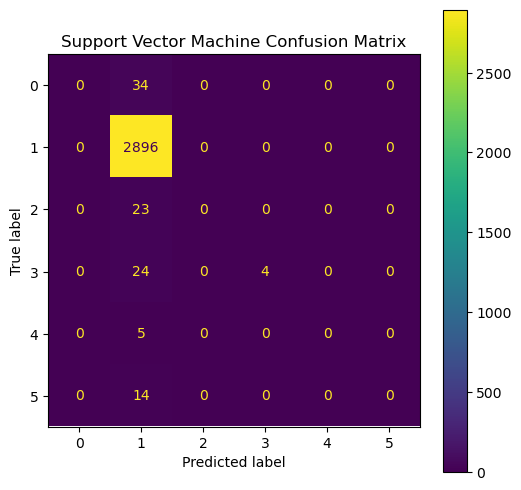

In [117]:
confusion_matrix_display(svc, svc_predicted_y, model_name="Support Vector Machine")

# Conclusion

In [118]:
def failure_type_scores_df(scoring_method):
    
    ftsdf = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree", "Support Vector Machine"],
    "Heat Dissipation Failure": [pd.DataFrame(rfc_cr)["0"][scoring_method],
                                 pd.DataFrame(lr_cr)["0"][scoring_method],
                                 pd.DataFrame(dtc_cr)["0"][scoring_method],
                                 pd.DataFrame(svc_cr)["0"][scoring_method]],
    "No Failure": [pd.DataFrame(rfc_cr)["1"][scoring_method],
                   pd.DataFrame(lr_cr)["1"][scoring_method],
                   pd.DataFrame(dtc_cr)["1"][scoring_method],
                   pd.DataFrame(svc_cr)["1"][scoring_method]],
    "Overstrain Failure": [pd.DataFrame(rfc_cr)["2"][scoring_method],
                           pd.DataFrame(lr_cr)["2"][scoring_method],
                           pd.DataFrame(dtc_cr)["2"][scoring_method],
                           pd.DataFrame(svc_cr)["2"][scoring_method]],
    "Power Failure": [pd.DataFrame(rfc_cr)["3"][scoring_method],
                      pd.DataFrame(lr_cr)["3"][scoring_method],
                      pd.DataFrame(dtc_cr)["3"][scoring_method],
                      pd.DataFrame(svc_cr)["3"][scoring_method]],
    "Random Failures": [pd.DataFrame(rfc_cr)["4"][scoring_method],
                        pd.DataFrame(lr_cr)["4"][scoring_method],
                        pd.DataFrame(dtc_cr)["4"][scoring_method],
                        pd.DataFrame(svc_cr)["4"][scoring_method]],
    "Tool Wear Failure": [pd.DataFrame(rfc_cr)["5"][scoring_method],
                           pd.DataFrame(lr_cr)["5"][scoring_method],
                           pd.DataFrame(dtc_cr)["5"][scoring_method],
                           pd.DataFrame(svc_cr)["5"][scoring_method]],
    })
    
    return ftsdf

# Precision Scores

In [119]:
failure_type_precision_score_df = failure_type_scores_df("precision")
failure_type_precision_score_df.style.background_gradient(cmap='YlOrRd').hide_index()

Model,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Random Forest,1.000000,0.998276,0.840000,0.870968,0.000000,0.928571
Logistic Regression,0.083333,0.972663,0.526316,1.000000,0.000000,0.000000
Decision Tree,0.870968,0.996210,0.760000,0.826087,0.000000,0.866667
Support Vector Machine,0.000000,0.966622,0.000000,1.000000,0.000000,0.000000


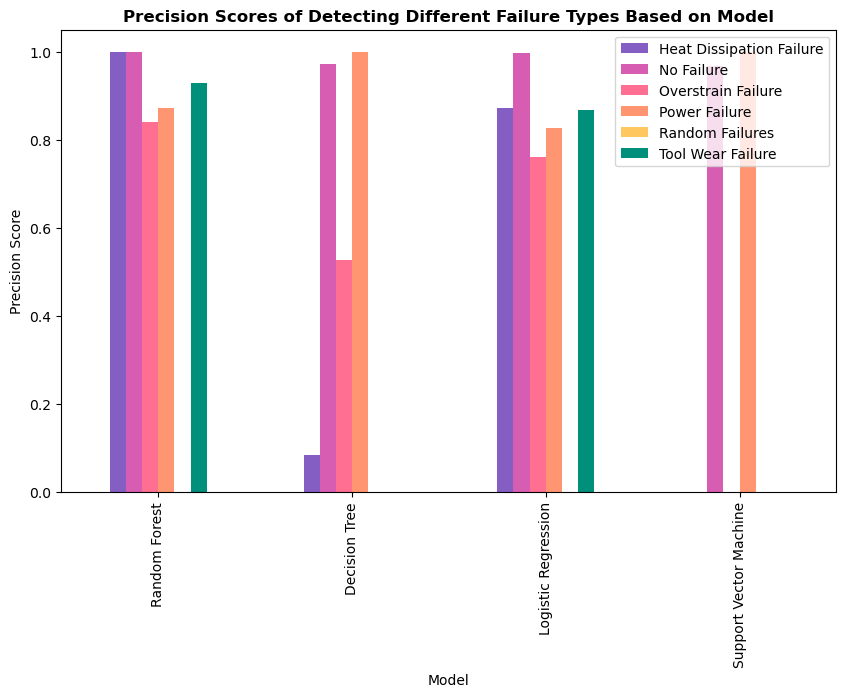

In [120]:
failure_type_precision_score_df.plot.bar(figsize=(10,6), color=colors)
plt.title("Precision Scores of Detecting Different Failure Types Based on Model", fontweight="bold")
plt.xlabel("Model")
plt.ylabel("Precision Score")
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

# Recall Scores

In [121]:
failure_type_recall_score_df = failure_type_scores_df("recall")
failure_type_recall_score_df.style.background_gradient(cmap='YlOrRd').hide_index()

Model,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Random Forest,0.882353,0.999655,0.913043,0.964286,0.000000,0.928571
Logistic Regression,0.029412,0.995166,0.434783,0.178571,0.000000,0.000000
Decision Tree,0.794118,0.998273,0.826087,0.678571,0.000000,0.928571
Support Vector Machine,0.000000,1.000000,0.000000,0.142857,0.000000,0.000000


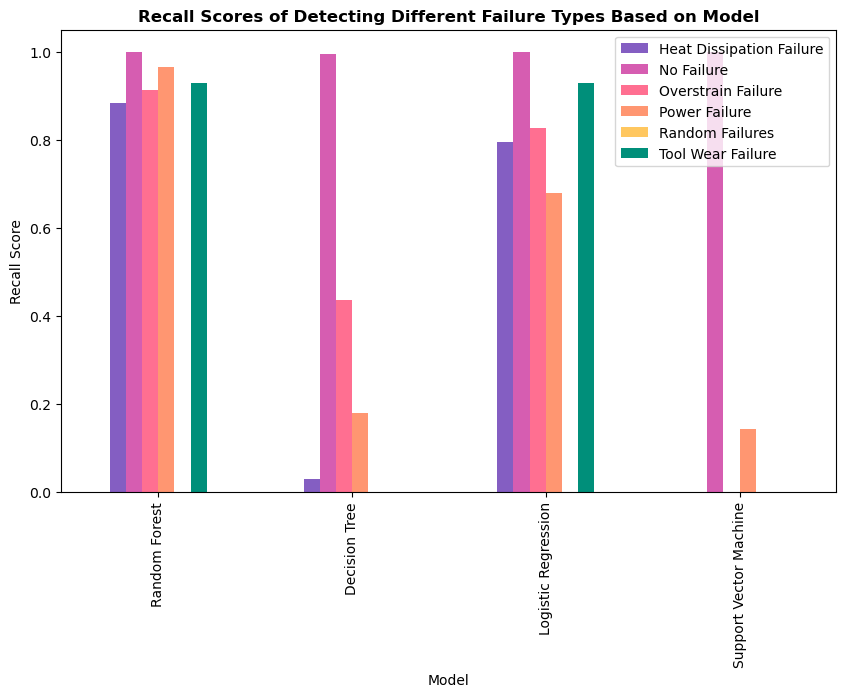

In [122]:
failure_type_recall_score_df.plot.bar(figsize=(10,6), color=colors)
plt.title("Recall Scores of Detecting Different Failure Types Based on Model", fontweight="bold")
plt.xlabel("Model")
plt.ylabel("Recall Score")
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

# F1 Scores

In [123]:
failure_type_f1_score_df = failure_type_scores_df("f1-score")
failure_type_f1_score_df.style.hide_index()

Model,Heat Dissipation Failure,No Failure,Overstrain Failure,Power Failure,Random Failures,Tool Wear Failure
Random Forest,0.937500,0.998965,0.875000,0.915254,0.000000,0.928571
Logistic Regression,0.043478,0.983786,0.476190,0.303030,0.000000,0.000000
Decision Tree,0.830769,0.997240,0.791667,0.745098,0.000000,0.896552
Support Vector Machine,0.000000,0.983028,0.000000,0.250000,0.000000,0.000000


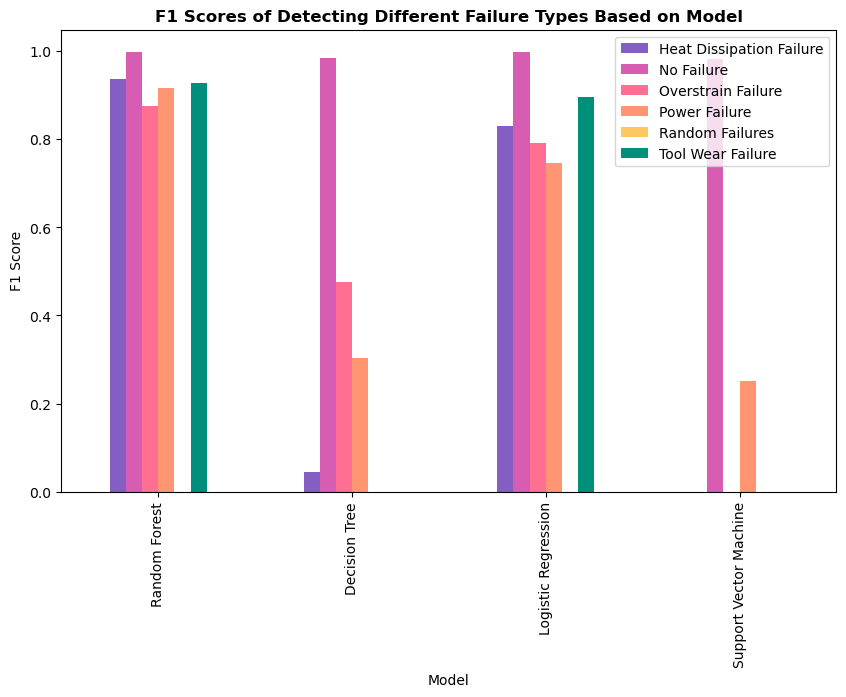

In [124]:
failure_type_f1_score_df.plot.bar(figsize=(10,6), color=colors)
plt.title("F1 Scores of Detecting Different Failure Types Based on Model", fontweight="bold")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

In [125]:
conclusion_df = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression", "Decision Tree", "Support Vector Machine"],
    "Precision Macro Average": [pd.DataFrame(rfc_cr)["macro avg"]["precision"],
                                pd.DataFrame(lr_cr)["macro avg"]["precision"],
                                pd.DataFrame(dtc_cr)["macro avg"]["precision"],
                                pd.DataFrame(svc_cr)["macro avg"]["precision"]],
    "Recall Macro Average": [pd.DataFrame(rfc_cr)["macro avg"]["recall"],
                                pd.DataFrame(lr_cr)["macro avg"]["recall"],
                                pd.DataFrame(dtc_cr)["macro avg"]["recall"],
                                pd.DataFrame(svc_cr)["macro avg"]["recall"]],
    "F1 Score Macro Average": [pd.DataFrame(rfc_cr)["macro avg"]["f1-score"],
                                pd.DataFrame(lr_cr)["macro avg"]["f1-score"],
                                pd.DataFrame(dtc_cr)["macro avg"]["f1-score"],
                                pd.DataFrame(svc_cr)["macro avg"]["f1-score"]],
})

In [126]:
conclusion_df = conclusion_df.sort_values(by='F1 Score Macro Average', ascending=False)
conclusion_df.style.background_gradient(cmap='YlOrRd').hide_index()

Model,Precision Macro Average,Recall Macro Average,F1 Score Macro Average
Random Forest,0.772969,0.781318,0.775882
Decision Tree,0.719988,0.704270,0.710221
Logistic Regression,0.430385,0.272989,0.301081
Support Vector Machine,0.327770,0.190476,0.205505


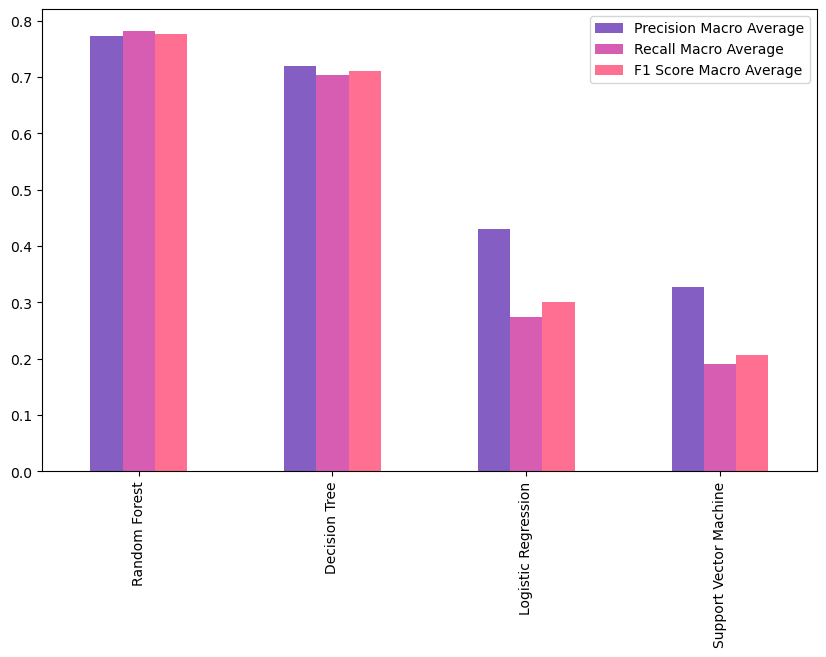

In [127]:
conclusion_df.plot.bar(figsize=(10,6), color=colors)
plt.xticks([0, 1, 2, 3],
           ["Random Forest", "Decision Tree", "Logistic Regression", "Support Vector Machine"],
           rotation='vertical');

In [128]:
df["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

## As we can see our models can detect No Failure quite easily (for example Decision Tree can detect all of them with precision and recall score of 100%) because out of 10000 rows that we have in our data, 9652 of them are No Failures, which indicates that our data is highly imbalanced. But for detecting other Labels the best score is for Random Forest Classification with f1 macro average of 77.58%. Also none of the models can detect Random Failures which is fair as they are RANDOM.